# Observations of endangered species in U.S. national parks

## Project goals
* Investigate if there are any patterns or themes to the types of species that become endangered

## Data
* species_info.csv - Conservation status of various species (including category, scientific name and common name)
* observations.csv - Observations of members of different species through U.S. national park

## Analysis
* Exploring data around endangered species and their “types”, along with where they tend to be spotted

## Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Load the Data

### species

The `species_info.csv` file contains data regarding:
* category - class of animal
* scientific_name - the scientific name of each species
* common_name - the common names of each species
* conservation_status - each species’ current conservation status

In [2]:
species_data = pd.read_csv('species_info.csv')
species_data.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### observations
The `observations.csv` file contains data regarding:
* scientific_name - the scientific name of each species
* park_name - Park where species were found
* observations - the number of times each species was observed at park

In [3]:
observation_data = pd.read_csv('observations.csv')
observation_data.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### shape of the data

In [4]:
print("species shape: {}".format(species_data.shape))
print("observations shape: {}".format(observation_data.shape))

species shape: (5824, 4)
observations shape: (23296, 3)


## Explore the Data

Time to explore the species data:
* There were 5541 species spanning seven categories

In [5]:
num_unique_species = species_data.scientific_name.nunique()
num_unique_categories = species_data.category.nunique()
species_data.conservation_status.unique()
print("There were {} species sighted from {} categories: {}".format(num_unique_species, num_unique_categories, species_data.category.unique()))

There were 5541 species sighted from 7 categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


The biggest share of species (4470) come from the `Vascular Plant` category, with the fewest (79) being `Reptile`s

In [6]:
species_data.head()
species_data.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Observing the `conservation_status` tells us that the observed species fell within 4 kinds of conservation statuses:
`Species of Concern`, `Endangered`, `Threatened`, and `In Recovery`, along with `nan` values

In [7]:
print("number of conservation statuses:{}".format(species_data.conservation_status.nunique()))
print("unique conservation statuses:{}".format(species_data.conservation_status.unique()))

number of conservation statuses:4
unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Most of the observations (5633) do not have an endangered status:

In [8]:
print("na values:{}".format(species_data.conservation_status.isna().sum()))

print(species_data.groupby("conservation_status").size())

na values:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


##### observations

Time to look at observations, starting with the parks.  There are only four parks that the sightings are from:

In [9]:
print(f"number of parks:{observation_data.park_name.nunique()}")
print(f"unique parks:{observation_data.park_name.unique()}")

number of parks:4
unique parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


There were 3,314,739 sightings in the parks:

In [10]:
print(f"number of observations:{observation_data.observations.sum()}")

number of observations:3314739


## Analysis

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

We previously saw that a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [11]:
species_data.fillna('No Intervention', inplace=True)
species_data.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Looking at the species in `Endangered` and `In Recovery` statuses, we see that birds number less than mammals, which could imply that birds are recovering better than mammals

In [12]:
conservationCategory = species_data[species_data.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


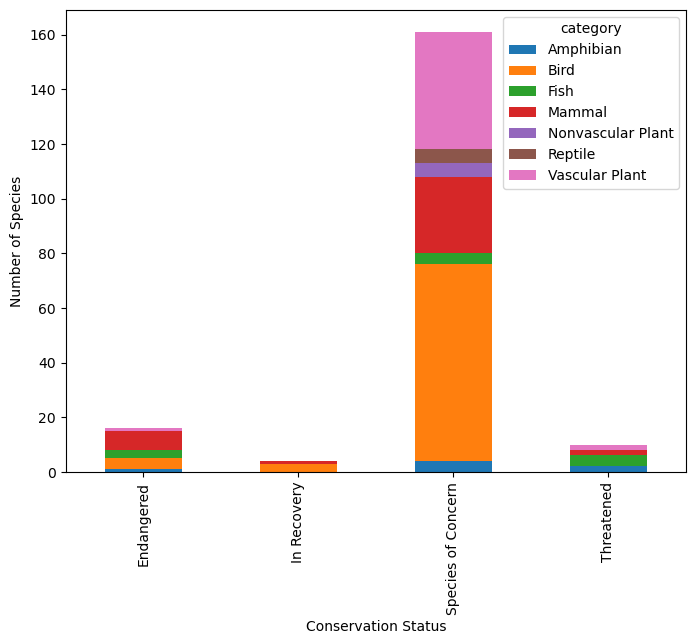

In [13]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

### Which types of species are more likely to be endangered?

We can create an `is_protected` column for any other species that don't have `No Intervention`:

In [14]:
species_data['is_protected'] = species_data.conservation_status != 'No Intervention'

We can break down by `category` and `is_protected`.  Birds and Vascular Plants have a higher number of protected species

In [15]:
category_counts = species_data.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Analyzing the percentage of each category in endangered status shows that about 17 percent of mammals and 15 percent of birds are in protected statuses.

In [16]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


### Statistical Signficance

Let's see if there is a signicant difference between the protected/non-protected of some categories.  We can achieve this by populating contingency tables that look like the one below and running a chi2 test:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The second value returned from `chi2_contingency` gives us a p-value of ~.688, which is much higher than .05.  Thi implies that the difference between the protected status of Birds and Mammals is not significantly great.

In [17]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

However, running the same test between Birds and Reptiles shows that there is a significant difference (~.039 is less than .05).

In [18]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

### Species in Parks

The next set of analysis will come from data from the conservationists as they have been recording sightings of different species at several national parks for the past 7 days.

The first step is to look at the the common names from species to get an idea of the most prevalent animals in the dataset. The data will be need to be split up into individual names.

In [19]:
import string
string.punctuation

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text


raw_bird_names = species_data[species_data.category == 'Bird'].common_names
common_bird_names = raw_bird_names.apply(remove_punctuations).str.split().tolist()
common_bird_names[:6]



[['Brewsters', 'Warbler'],
 ['Coopers', 'Hawk'],
 ['Northern', 'Goshawk'],
 ['SharpShinned', 'Hawk'],
 ['Golden', 'Eagle'],
 ['RedTailed', 'Hawk']]

The next step is to clean up duplicate words in each row since they should no be counted more than once per species.

In [20]:
cleanRows = []

for item in common_bird_names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Brewsters', 'Warbler'],
 ['Coopers', 'Hawk'],
 ['Northern', 'Goshawk'],
 ['SharpShinned', 'Hawk'],
 ['Golden', 'Eagle'],
 ['RedTailed', 'Hawk']]

Next the words need to be collapsed into one list for easier use.

In [21]:
from itertools import chain

res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Brewsters', 'Warbler', 'Coopers', 'Hawk', 'Northern', 'Goshawk']

Now the data is ready to be able to count the number of occurrences of each word. From this analysis, it seems that `Warbler` occurred 59 times while `Sparrow` came up 29 times.

In [22]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
432,Warbler,59
386,Sparrow,29
454,American,21
51,Northern,20
22,Common,18
282,Flycatcher,18
59,Owl,18
0,Woodpecker,12
111,Western,12
66,Sandpiper,11


In the data, there are several different scientific names for different types of warblers.  The next task is to figure out which rows of `species_data` are referring to warblers. A new column made up of boolean values will be created to check if `is_warbler` is `True`.

In [23]:
species_data['is_warbler'] = species_data.common_names.str.contains(r"\bWarbler\b", regex = True)

species_data.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_warbler
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Here is a subset of the data where `is_warbler` is true, returning see the rows that matched. There seems to be a lot of species of warblers and a mix of protected vs. non-protected species. 

In [24]:
species_data[species_data.is_warbler]

,category,scientific_name,common_names,conservation_status,is_protected,is_warbler
90,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,No Intervention,False,True
247,Bird,Dendroica caerulescens,Black-Throated Blue Warbler,No Intervention,False,True
248,Bird,Dendroica castanea,Bay-Breasted Warbler,No Intervention,False,True
249,Bird,Dendroica cerulea,Cerulean Warbler,No Intervention,False,True
250,Bird,Dendroica coronata,Yellow-Rumped Warbler,No Intervention,False,True
251,Bird,Dendroica discolor,Prairie Warbler,No Intervention,False,True
252,Bird,Dendroica dominica,Yellow-Throated Warbler,No Intervention,False,True
253,Bird,Dendroica fusca,Blackburnian Warbler,No Intervention,False,True
254,Bird,Dendroica magnolia,Magnolia Warbler,No Intervention,False,True
255,Bird,Dendroica palmarum,Palm Warbler,No Intervention,False,True


Next the results of the warblers species will be merged with `observations` to create a `DataFrame` with observations of warblers across the four national parks. 

In [25]:
warbler_observations = observation_data.merge(species_data[species_data.is_warbler])
warbler_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_warbler
0,Vermivora celata,Yosemite National Park,106,Bird,Orange-Crowned Warbler,No Intervention,False,True
1,Vermivora celata,Great Smoky Mountains National Park,76,Bird,Orange-Crowned Warbler,No Intervention,False,True
2,Vermivora celata,Yellowstone National Park,281,Bird,Orange-Crowned Warbler,No Intervention,False,True
3,Vermivora celata,Bryce National Park,121,Bird,Orange-Crowned Warbler,No Intervention,False,True
4,Setophaga dominica,Yosemite National Park,140,Bird,Yellow-Throated Warbler,No Intervention,False,True
...,...,...,...,...,...,...,...,...
231,Oreothlypis virginiae,Bryce National Park,84,Bird,Virginia's Warbler,No Intervention,False,True
232,Setophaga petechia,Great Smoky Mountains National Park,82,Bird,Yellow Warbler,No Intervention,False,True
233,Setophaga petechia,Yellowstone National Park,245,Bird,Yellow Warbler,No Intervention,False,True
234,Setophaga petechia,Bryce National Park,134,Bird,Yellow Warbler,No Intervention,False,True


Let's see how many total warbler observations(across all species) were made at each national park.  

The total number of warblers observed in each park over the past 7 days are in the table below. Yellowstone National Park seems to have the largest with 14,487 observations and the Great Smoky Mountains National Park having the lowest with 4,435. 

In [26]:
warbler_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,5760
1,Great Smoky Mountains National Park,4435
2,Yellowstone National Park,14487
3,Yosemite National Park,8712


Now let's see each park broken down by protected warblers vs. non-protected warbler sightings. It seems that every park has more sightings of protected warblers than not. This might not be a great sign for warblers.

In [27]:
obs_by_park = warbler_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,5565
1,Bryce National Park,True,195
2,Great Smoky Mountains National Park,False,4290
3,Great Smoky Mountains National Park,True,145
4,Yellowstone National Park,False,13995
5,Yellowstone National Park,True,492
6,Yosemite National Park,False,8441
7,Yosemite National Park,True,271


Below is a plot from the output of the last data manipulation. From this chart one can see that there are more sightings of non-protected warblers compared to protected species. All the parks might need to beef up their efforts in conservation as they have seen more non-protected species.

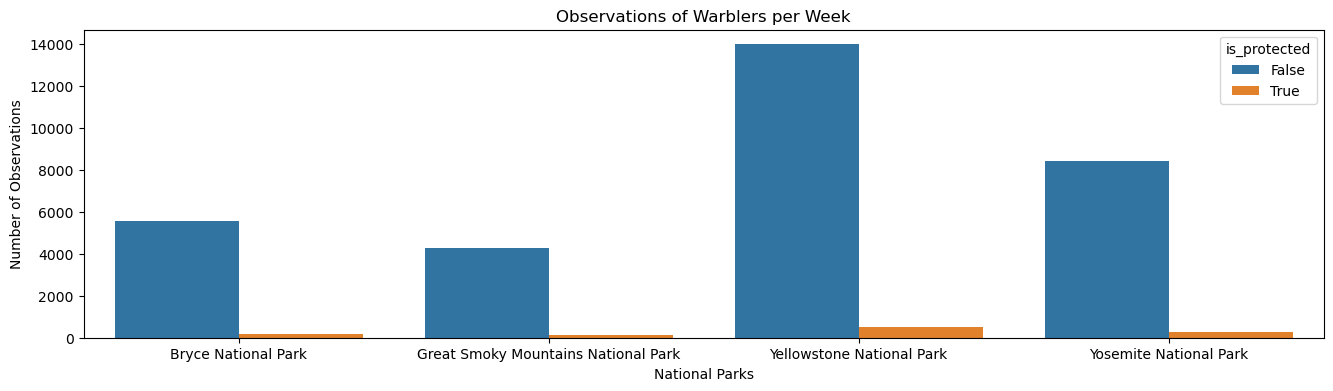

In [28]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Warblers per Week')
plt.show()